# Supply Chain Analysis - Hypothesis Testing, Machine Learning

## 1. Hypothesis Testing, Machine Learning
### Delivery Performance Hypotheses
- **H1**: There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.
- **H2**: Departments with higher total sales experience a higher Late_delivery_risk.

### Fraud Detection Hypotheses
- **H3**: Categories with higher total sales have a higher incidence of suspected fraud (SUSPECTED_FRAUD).
- **H4**: The average sales per customer in categories with suspected fraud are significantly different from those without fraud.

## Machine Learning Models and Predictions
### Late Delivery Risk Prediction
- **Model**: Classification (Logistic Regression, Decision Trees, Gradient Boosting)
- **Objective**: Predict the probability of a delivery being late based on shipment data.
- **Features**: Days for shipment (scheduled), Product Category, Department, Shipping Method, Historical Delivery Performance.
- **Target**: Late_delivery_risk (binary classification).

### Fraud Detection Model
- **Model**: Classification (Logistic Regression, Random Forest Classifier, Gradient Boosting, Neural Networks)
- **Objective**: Classify whether a transaction is fraudulent (SUSPECTED_FRAUD) based on sales data and other features.
- **Features**: Sales, Product Category, Department, Order Value, Customer Segment, Transaction Type.
- **Target**: SUSPECTED_FRAUD (binary classification).

### 2. Strategic Recommendations based on hypothesis conclusions
- **Data-Driven Insights:** Synthesized findings into actionable insights, focusing on the most critical areas for improvement, such as optimizing `Days for shipping (real)`, reducing `Late_delivery_risk`, and enhancing customer satisfaction through targeted `Customer Segment` initiatives.
- **Proposed Strategies:** Recommended strategies to improve operational efficiency, such as optimizing shipping schedules (`Days for shipment (scheduled)`) and offering personalized benefits (`Benefit per order`) to customers, as well as leveraging customer data like `Sales per customer` to tailor retention efforts.
- **Implementation Plan:** Outlined a phased approach for implementing the recommendations, with specific actions targeting key variables such as `Delivery Status` and `Late_delivery_risk`, along with timelines, responsibilities, and success metrics to track progress and outcomes.

### 3. Impact Assessment
- **Scenario Analysis:** Modeled potential outcomes of proposed strategies using what-if scenarios to estimate their impact on delivery performance and customer satisfaction, such as the effect of improving `Days for shipping (real)` and reducing `Late_delivery_risk` on `Delivery Status` and overall sales.
- **KPIs:** Defined key performance indicators to track the effectiveness of implemented strategies, focusing on metrics like `Sales per customer`, `Benefit per order`, and `Delivery Status` to monitor improvements in customer retention and operational efficiency over time.

### 9. Reporting and Communication
- **Stakeholder Reports:** Prepared detailed reports for senior management and operations teams, summarizing key findings related to `Late_delivery_risk`, `Days for shipping (real)`, and customer retention. The reports outlined recommendations for improving delivery performance and customer satisfaction.

In [24]:
#Libraries for import
# Data manipulation
import pandas as pd
import numpy as np

# Statistical tests
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/Users/teitelbaumsair/Desktop/Data Bootcamp Repo/DI_Bootcamp/Data Bootcamp Final Project/Data/DataCoSupplyChainDataset_clean.csv')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,SUSPECTED_FRAUD,Year_Month,Year,Month,Month_Year
0,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,2015-01-03,Standard Class,False,2015-01,2015,1,01/2015
1,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,...,Pelican Sunstream 100 Kayak,199.990005,0,2015-01-04,Standard Class,False,2015-01,2015,1,01/2015
2,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,2015-01-04,Standard Class,False,2015-01,2015,1,01/2015
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.750000,0,2018-01-16,Standard Class,False,2018-01,2018,1,01/2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,2018-01-15,Standard Class,False,2018-01,2018,1,01/2018


### Delivery Performance Hypotheses
- **H1**: There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.
- **H2**: Departments with higher total sales experience a higher Late_delivery_risk.

In [25]:
# Delivery Performance Hypothesis
#- **Hypothesis**: There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.
#- **Null Hypothesis**:  There is no significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.
#- **Alternative Hypothesis**:There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.

# Filter the dataset for the 'Delivery Status' column
delivery_status = df['Delivery Status']

# Filter the dataset for the 'Department Name' column
department_name = df['Department Name']

# Filter the dataset for the 'Days for shipment (scheduled)' column
days_shipped = df['Days for shipment (scheduled)']

# Filter the dataset for the 'Days for shipping (real)' column
days_shipping = df['Days for shipping (real)']

print(f"days_shipped: {days_shipped}")
print(f"days_shipping: {days_shipping}")

avg_days_shipped = np.mean(days_shipped)
avg_days_shipping = np.mean(days_shipping)

print(f"avg_days_shipped: {avg_days_shipped}")
print(f"avg_days_shipping: {avg_days_shipping}")

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(days_shipped, days_shipping)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.")

else:
    print("Fail to reject the null hypothesis. There is no significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.")



days_shipped: 0         4
1         4
2         4
3         4
4         4
         ..
180514    4
180515    2
180516    4
180517    4
180518    4
Name: Days for shipment (scheduled), Length: 180519, dtype: int64
days_shipping: 0         2
1         3
2         3
3         3
4         2
         ..
180514    4
180515    3
180516    5
180517    4
180518    4
Name: Days for shipping (real), Length: 180519, dtype: int64
avg_days_shipped: 2.931846509231715
avg_days_shipping: 3.4976539865609713
T-statistic: -113.00375000615662
P-value: 0.0
Reject the null hypothesis. There is a significant difference between Days for shipment (scheduled) and Days for shipping (real) across different departments.


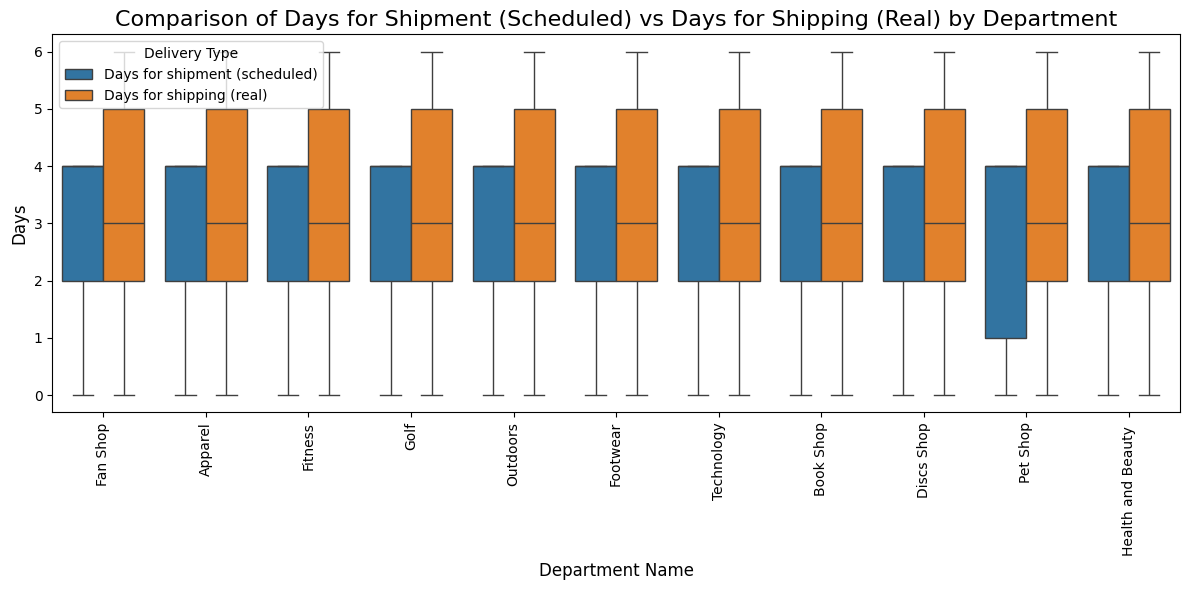

In [26]:
plt.figure(figsize=(12, 6))

# Combine the two columns into a new dataframe for visualization
df_melted = pd.melt(df, id_vars=['Department Name'], value_vars=['Days for shipment (scheduled)', 'Days for shipping (real)'],
                    var_name='Delivery Type', value_name='Days')

sns.boxplot(x='Department Name', y='Days', hue='Delivery Type', data=df_melted)
plt.title('Comparison of Days for Shipment (Scheduled) vs Days for Shipping (Real) by Department', fontsize=16)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.xticks(rotation=90)  # Rotate department names for better readability

# Show the plot
plt.tight_layout()
plt.show()

#### Hypothesis Conclusions:
- The analysis reveals a significant difference between the scheduled days for shipment and the actual days for shipping across different departments. The negative T-statistic of -113.00, along with a P-value of 0.0, strongly indicates that the null hypothesis should be rejected. This suggests that the shipping process is not fully aligned with the scheduled shipment days, highlighting potential areas for improvement in efficiency or consistency across departments.

In [27]:
# Delivery Performance Hypothesis
#- **Hypothesis**: Departments with higher total sales experience a higher Late_delivery_risk.
#- **Null Hypothesis**: There is no significant difference between the scheduled days for shipment and the actual days for shipping across departments with varying total sales.
#- **Alternative Hypothesis**: There is a significant difference between the scheduled days for shipment and the actual days for shipping across departments with varying total sales.


# Filter the dataset for the 'Late_delivery_risk' column
late_delivery_risk = df['Late_delivery_risk']
true_late_delivery_risk = late_delivery_risk == 1
false_late_delivery_risk = late_delivery_risk == 0
true_late_delivery_risk_count = true_late_delivery_risk.sum()
false_late_delivery_risk_count = false_late_delivery_risk.sum()

print(f"True Late Delivery Risk Count: {true_late_delivery_risk_count}")
print(f"False Late Delivery Risk Count: {false_late_delivery_risk_count}")

# Filter the dataset for the 'Department Name' column
department_name = df['Department Name']

# Group by department and calculate the count of late delivery risks
department_risk_stats = df.groupby('Department Name')['Late_delivery_risk'].value_counts().unstack(fill_value=0)

# Calculate the total deliveries for each department
department_risk_stats['Total_deliveries'] = department_risk_stats.sum(axis=1)

# Calculate the percentage of true late delivery risks for each department
department_risk_stats['True_risk_percent'] = (department_risk_stats[1] / department_risk_stats['Total_deliveries']) * 100

print(f"Departments at risk of late delivery: {department_risk_stats}")

# Filter for sales
sales = df['Sales']
# Create a binary column based on the median sales value: High Sales vs Low Sales
median_sales = sales.median()
high_sales = sales > median_sales

# Create two groups: High Sales and Low Sales
df['Sales_Group'] = ['High' if x else 'Low' for x in high_sales]

# Group by 'Sales_Group' and calculate the average late delivery risk
high_sales_risk = df[df['Sales_Group'] == 'High']['Late_delivery_risk']
low_sales_risk = df[df['Sales_Group'] == 'Low']['Late_delivery_risk']

# Perform a T-test on the Late Delivery Risk for High and Low Sales groups
t_statistic, p_value = stats.ttest_ind(high_sales_risk, low_sales_risk)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in late delivery risk between departments with high and low sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in late delivery risk between departments with high and low sales.")



True Late Delivery Risk Count: 98977
False Late Delivery Risk Count: 81542
Departments at risk of late delivery: Late_delivery_risk      0      1  Total_deliveries  True_risk_percent
Department Name                                                      
Apparel             22173  26825             48998          54.747133
Book Shop             176    229               405          56.543210
Discs Shop            923   1103              2026          54.442251
Fan Shop            30238  36623             66861          54.774831
Fitness              1102   1377              2479          55.546591
Footwear             6576   7949             14525          54.726334
Golf                15022  18198             33220          54.780253
Health and Beauty     160    202               362          55.801105
Outdoors             4311   5375              9686          55.492463
Pet Shop              202    290               492          58.943089
Technology            659    806              1

#### Hypothesis Conclusions:
- The analysis indicates that there is no significant relationship between total sales and late delivery risk across departments, as the p-value (0.23) exceeds the 0.05 threshold. This suggests that factors other than sales might be influencing delivery performance. Consequently, we fail to reject the null hypothesis, concluding that total sales do not have a significant impact on late delivery risk.

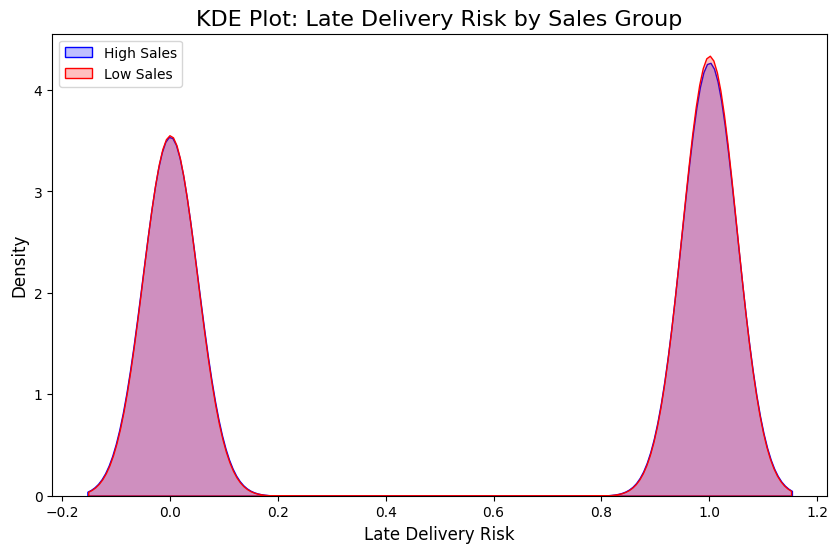

In [28]:
# Plotting the KDE for Late_delivery_risk grouped by Sales Group
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Sales_Group'] == 'High'], x='Late_delivery_risk', fill=True, label='High Sales', color='blue')
sns.kdeplot(data=df[df['Sales_Group'] == 'Low'], x='Late_delivery_risk', fill=True, label='Low Sales', color='red')

plt.title('KDE Plot: Late Delivery Risk by Sales Group', fontsize=16)
plt.xlabel('Late Delivery Risk', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

# Show the plot
plt.show()

### Fraud Detection Hypotheses
- **H3**: Categories with higher total sales have a higher incidence of suspected fraud (SUSPECTED_FRAUD).
- **H4**: The average sales per customer in categories with suspected fraud are significantly different from those without fraud.

In [29]:
### Fraud Detection Hypotheses
#- **Hypothesis**: Categories with higher total sales have a higher incidence of suspected fraud (SUSPECTED_FRAUD).
#- **Null Hypothesis**: There is no significant difference in the incidence of suspected fraud (SUSPECTED_FRAUD) between categories with higher total sales and those with lower total sales.
#- **Alternative Hypothesis**: Categories with higher total sales have a significantly higher incidence of suspected fraud (SUSPECTED_FRAUD) compared to categories with lower total sales.
suspected_fraud = df['SUSPECTED_FRAUD']
suspected_fraud_true = suspected_fraud == 1
suspected_fraud_false = suspected_fraud == 0  

suspected_fraud_true_count = suspected_fraud_true.sum()
suspected_fraud_false_count = suspected_fraud_false.sum()

print(f"True Suspected Fraud Count: {suspected_fraud_true_count}")
print(f"False Suspected Fraud Count: {suspected_fraud_false_count}")

# Filter for the 'category_name' and 'Sales' columns
category_name = df['Category Name']
sales = df['Sales']

# Group by category and calculate the count of suspected fraud
category_fraud_stats = df.groupby('Category Name')['SUSPECTED_FRAUD'].value_counts().unstack(fill_value=0)

# Calculate the total deliveries for each category
category_fraud_stats['Total_deliveries'] = category_fraud_stats.sum(axis=1)

# Calculate the percentage of suspected fraud for each category
category_fraud_stats['Suspected_fraud_percent'] = (category_fraud_stats[1] / category_fraud_stats['Total_deliveries']) * 100

print(f"Category Fraud Stats: {category_fraud_stats}")

# Median sales to create high/low sales groups
median_sales = sales.median()
high_sales = sales > median_sales

# Create a new column for Sales_Group based on median sales value
df['Sales_Group'] = ['High' if x else 'Low' for x in high_sales]

# Convert SUSPECTED_FRAUD to integers (0 and 1)
df['SUSPECTED_FRAUD'] = df['SUSPECTED_FRAUD'].astype(int)

# Group by Sales_Group and calculate the average suspected fraud
high_sales_fraud = df[df['Sales_Group'] == 'High']['SUSPECTED_FRAUD']
low_sales_fraud = df[df['Sales_Group'] == 'Low']['SUSPECTED_FRAUD']

# Perform a T-test on the suspected fraud for High and Low Sales groups
t_statistic, p_value = stats.ttest_ind(high_sales_fraud, low_sales_fraud)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in suspected fraud between categories with high and low sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in suspected fraud between categories with high and low sales.")


True Suspected Fraud Count: 4062
False Suspected Fraud Count: 176457
Category Fraud Stats: SUSPECTED_FRAUD       False  True  Total_deliveries  Suspected_fraud_percent
Category Name                                                               
Accessories            1736    44              1780                 2.471910
As Seen on  TV!          68     0                68                 0.000000
Baby                    201     6               207                 2.898551
Baseball & Softball     621    11               632                 1.740506
Basketball               64     3                67                 4.477612
Books                   394    11               405                 2.716049
Boxing & MMA            411    12               423                 2.836879
CDs                     266     5               271                 1.845018
Cameras                 576    16               592                 2.702703
Camping & Hiking      13424   305             13729           

### Hypothesis Conclusion:
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no significant difference in suspected fraud rates between categories with high and low sales.

/var/folders/_7/7nx4t_6s6995xg_cj866wrmr0000gn/T/ipykernel_78662/381759348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Variance_Suspected_Fraud', data=category_fraud_stats, palette='viridis')


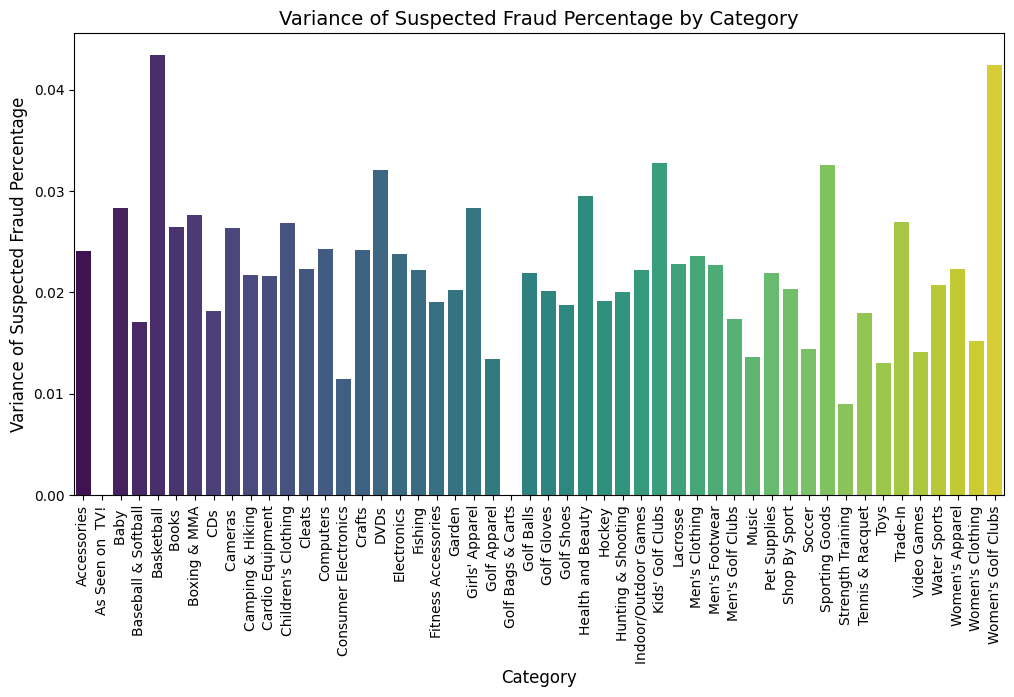

In [30]:
# Group by category_name and calculate the mean and variance of suspected fraud
category_fraud_stats = df.groupby('Category Name')['SUSPECTED_FRAUD'].agg(['mean', 'var']).reset_index()

# Rename columns for clarity
category_fraud_stats.columns = ['Category', 'Mean_Suspected_Fraud', 'Variance_Suspected_Fraud']

# Optionally, create a plot for the variance of suspected fraud per category (with error bars)
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Variance_Suspected_Fraud', data=category_fraud_stats, palette='viridis')

# Add title and labels
plt.title('Variance of Suspected Fraud Percentage by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Variance of Suspected Fraud Percentage', fontsize=12)
plt.xticks(rotation=90)  # Rotate category names for better readability

# Show the plot
plt.show()

In [31]:
### Fraud Detection Hypotheses
#- **Hypothesis**: The average sales per customer in categories with suspected fraud are significantly different from those without fraud.
#- **Null Hypothesis**: The average sales per customer in categories with suspected fraud are equal to the average sales per customer in categories without fraud.
#- **Alternative Hypothesis**: The average sales per customer in categories with suspected fraud are significantly different from those without fraud.

suspected_fraud = df['SUSPECTED_FRAUD']
sales_per_customer = df['Sales per customer']
category_name = df['Category Name']

# Print the counts of suspected fraud (True = 1, False = 0)
suspected_fraud_true_count = (suspected_fraud == 1).sum()
suspected_fraud_false_count = (suspected_fraud == 0).sum()

print(f"True Suspected Fraud Count: {suspected_fraud_true_count}")
print(f"False Suspected Fraud Count: {suspected_fraud_false_count}")

# Group the dataset by 'Category Name' and 'SUSPECTED_FRAUD' to get the average sales per customer
category_fraud_sales = df.groupby(['Category Name', 'SUSPECTED_FRAUD'])['Sales per customer'].mean().unstack(fill_value=0)

print(f"Category Fraud Sales: {category_fraud_sales}")

# Split the dataset into two groups based on suspected fraud (1 for fraud, 0 for no fraud)
fraud_group_sales = category_fraud_sales[1]  # Sales for categories with fraud
no_fraud_group_sales = category_fraud_sales[0]  # Sales for categories without fraud

# Group by category and fraud status to calculate the variance in sales per customer
category_fraud_variance = df.groupby(['Category Name', 'SUSPECTED_FRAUD'])['Sales per customer'].var().unstack(fill_value=0)

# Print the calculated variance for each category and fraud status
print(f"Category Fraud Variance: {category_fraud_variance}")

# Perform a T-test to check if there is a significant difference in the average sales per customer
t_statistic, p_value,  = stats.ttest_ind(fraud_group_sales.dropna(), no_fraud_group_sales.dropna())

# Print the results of the T-test
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average sales per customer between categories with suspected fraud and those without.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average sales per customer between categories with suspected fraud and those without.")


True Suspected Fraud Count: 4062
False Suspected Fraud Count: 176457
Category Fraud Sales: SUSPECTED_FRAUD                 0            1
Category Name                                 
Accessories             67.468168    58.813863
As Seen on  TV!        272.347205     0.000000
Baby                    52.927215    53.171667
Baseball & Softball    133.850871   113.261817
Basketball             372.966557   278.489990
Books                   27.891371    28.565455
Boxing & MMA           181.880438   127.821666
CDs                     10.147669    10.150000
Cameras                405.796283   422.376247
Camping & Hiking       269.557960   269.631384
Cardio Equipment       265.958731   263.147246
Children's Clothing    320.734796   329.028895
Cleats                 162.238865   161.756930
Computers             1346.641531  1362.954545
Consumer Electronics   227.362676   216.212000
Crafts                 414.613984   417.255831
DVDs                   147.568586   150.303124
Electronics     

#### Hypothesis Conclusions:
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no significant difference in average sales per customer between categories with suspected fraud and those without.

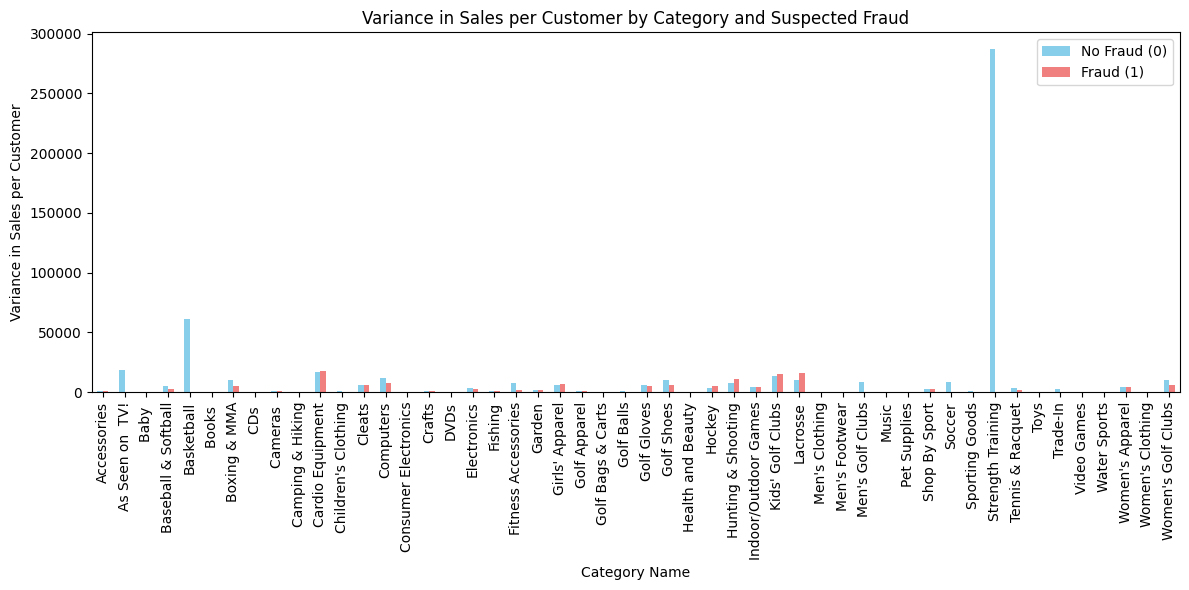

In [32]:
category_fraud_variance.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Variance in Sales per Customer by Category and Suspected Fraud')
plt.ylabel('Variance in Sales per Customer')
plt.xlabel('Category Name')
plt.xticks(rotation=90)
plt.legend(['No Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()